In [2]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [5]:
bias = torch.rand_like(X)

In [11]:
y = (2*X)+20*bias

In [9]:
import matplotlib.pyplot as plt

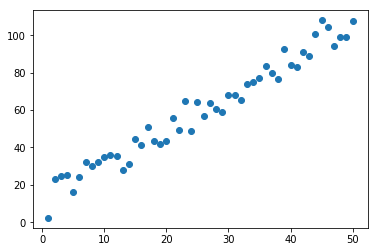

In [12]:
plt.scatter(X,y)

In [ ]:
# Syntax for writing the model in pytorch

# class Linear(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # Define model architecture/layout 
#         layers(i/p dim,o/p dim)
    
#     def forward (self,x):
        
#         return  Output
    

In [13]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Linear(1,1)
    
    def forward (self,x):
                
        output = self.linear(x)
        return output   

In [14]:
model = Model()

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>

In [16]:
model.linear.weight

Parameter containing:
tensor([[-0.2982]], requires_grad=True)

In [17]:
model.linear.bias

Parameter containing:
tensor([0.3199], requires_grad=True)

In [18]:
bias = 0.3199
weight = -0.2982

ypred = (weight*X+bias)

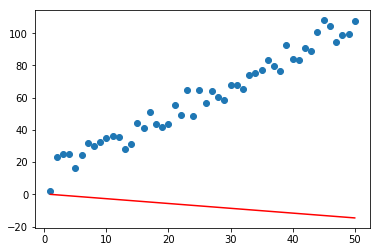

In [19]:
plt.scatter(X,y)
plt.plot(X.numpy(),ypred.numpy(),'r')

In [ ]:
# Define loss function and optimizer

<img src="Linear regression.png" width=350, height=350>

In [20]:
def mse(actual,predicted):
    error = actual - predicted
    Sq_error = error*error
    meanse = np.mean(Sq_error)
    return meanse

In [21]:
mse(10,7)

9.0

In [22]:
def rmse(actual,predicted):
    error = actual - predicted
    Sq_error = error*error
    meanse = np.mean(Sq_error)
    rmse = np.sqrt(meanse)
    return rmse

In [23]:
rmse(10,7)

3.0

In [24]:
criterion = nn.MSELoss()


<img src="gradient_descent_demystified.png" >

<img src="Covergance.png" >


<img src="learnning rate.png" >


In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
# syntax for forward and backward propogation is:

# epochs = n
# placeholder_for_loss = []

# for i in range(n):
#     # FORWARD pass
#     predicted_y = model.forward(i/p)
#     loss = criterion(y_predicted,y_actuals)
#     placeholder_for_loss.append(loss)
    
#     # BACKWARD pass
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()


In [26]:
epochs = 30
losses = []

for i in range(epochs):
    y_pred2 = model.forward(X)
    loss = criterion(y_pred2,y)
    losses.append(loss)
    
    print(f"epoch{i} Loss {loss.item()}  Bias {model.linear.bias.item()}  Weight {model.linear.weight.item()} "  )
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch0 Loss 5470.07568359375  Bias 0.3199232816696167  Weight -0.29818296432495117 
epoch1 Loss 2855.9619140625  Bias 0.4538939595222473  Weight 4.009437561035156 
epoch2 Loss 1506.3699951171875  Bias 0.3679080605506897  Weight 0.9140410423278809 
epoch3 Loss 809.6072998046875  Bias 0.4399593770503998  Weight 3.1378254890441895 
epoch4 Loss 449.8762512207031  Bias 0.39845359325408936  Weight 1.5396974086761475 
epoch5 Loss 264.142822265625  Bias 0.43853533267974854  Weight 2.6876718997955322 
epoch6 Loss 168.2380828857422  Bias 0.419990211725235  Weight 1.862529993057251 
epoch7 Loss 118.70865631103516  Bias 0.44356441497802734  Weight 2.4551024436950684 
epoch8 Loss 93.12128448486328  Bias 0.436870276927948  Weight 2.0290257930755615 
epoch9 Loss 79.89427947998047  Bias 0.45191943645477295  Weight 2.334864377975464 
epoch10 Loss 73.0484848022461  Bias 0.4513407349586487  Weight 2.1148104667663574 
epoch11 Loss 69.4970932006836  Bias 0.4619859457015991  Weight 2.272618532180786 
epoch1

In [27]:
w1 =2.2035
b1 = 0.5666

ypred_new = w1*X+b1

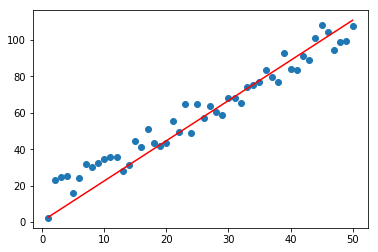

In [28]:
plt.scatter(X,y)
plt.plot(X.numpy(),ypred_new.numpy(),'r')

In [1]:
# Data download for day 4

In [ ]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [ ]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)